In [1]:
from api import CtrLoRA
from PIL import Image
import glob,os

/home/xxu/anaconda3/envs/ctrlora/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


logging improved.


In [2]:
ctrlora = CtrLoRA(num_loras=1)
ctrlora.create_model(
    sd_file='/data07/shared/xxu/cvpr/may07/sd15/v1-5-pruned.ckpt',
    basecn_file='/data07/shared/xxu/cvpr/may07/ctrlora/ctrlora-basecn/ctrlora_sd15_basecn700k.ckpt',
    lora_files='/data07/shared/xxu/cvpr/may07/ctrfinetune/lightning_logs/version_2/save_path/epoch=3-step=199999_saved_lora.ckpt',
)

No module 'xformers'. Proceeding without it.
ControlInferenceLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Loaded model config from [configs/inference/ctrlora_sd15_rank128_1lora.yaml]
Loaded state_dict from [/data07/shared/xxu/cvpr/may07/sd15/v1-5-pruned.ckpt]
Loaded state_dict from [/data07/shared/xxu/cvpr/may07/ctrlora/ctrlora-basecn/ctrlora_sd15_basecn700k.ckpt]
Loaded state_dict from [/data07/shared/xxu/cvpr/may07/ctrfinetune/lightning_logs/version_2/save_path/epoch=3-step=199999_saved_lora.ckpt]


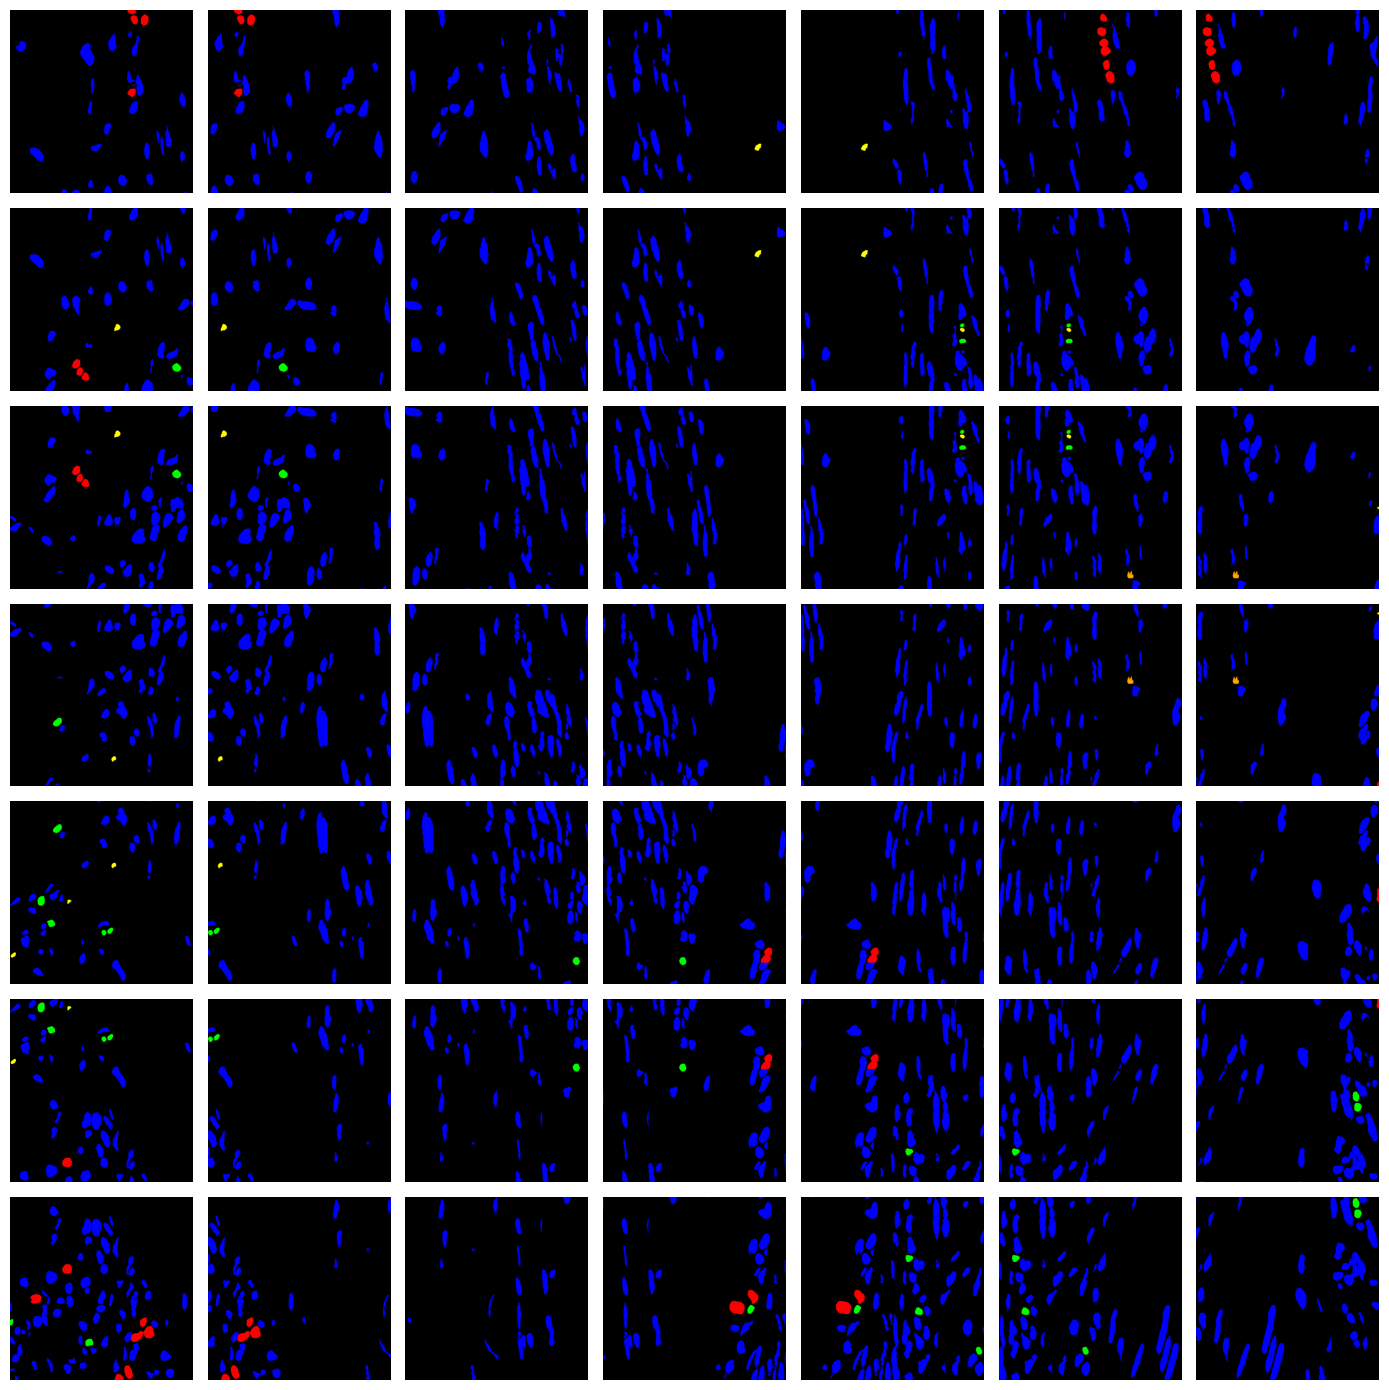

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置完整 base name
full_base = "TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672"

# 提取信息
parts = full_base.split("_")
base_name = "_".join(parts[:-2])
base_row = int(parts[-2])
base_col = int(parts[-1])

# 参数
stride = 256
rows, cols = 7, 7
patch_size = 512
image_dir = "/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/nuclei_512"

path_list = []
# 创建子图
fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for r in range(rows):
    for c in range(cols):
        r_offset = r * stride
        c_offset = c * stride
        fname = f"{base_name}_{base_row}_{base_col}_r{r_offset}_c{c_offset}.png"
        path = os.path.join(image_dir, fname)
        path_list.append(path)

        if not os.path.exists(path):
            img = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)
            print(f"Missing: {path}")
        else:
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axs[r, c].imshow(img)
        # axs[r, c].set_title(f"r{r_offset}_c{c_offset}", fontsize=8)
        axs[r, c].axis("off")

plt.tight_layout()
# plt.suptitle(full_base, fontsize=12)
plt.show()

In [6]:
path_list

['/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/nuclei_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c0.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/nuclei_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c256.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/nuclei_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c512.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/nuclei_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c768.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/nuclei_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c1024.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/nuclei_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c1280.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl

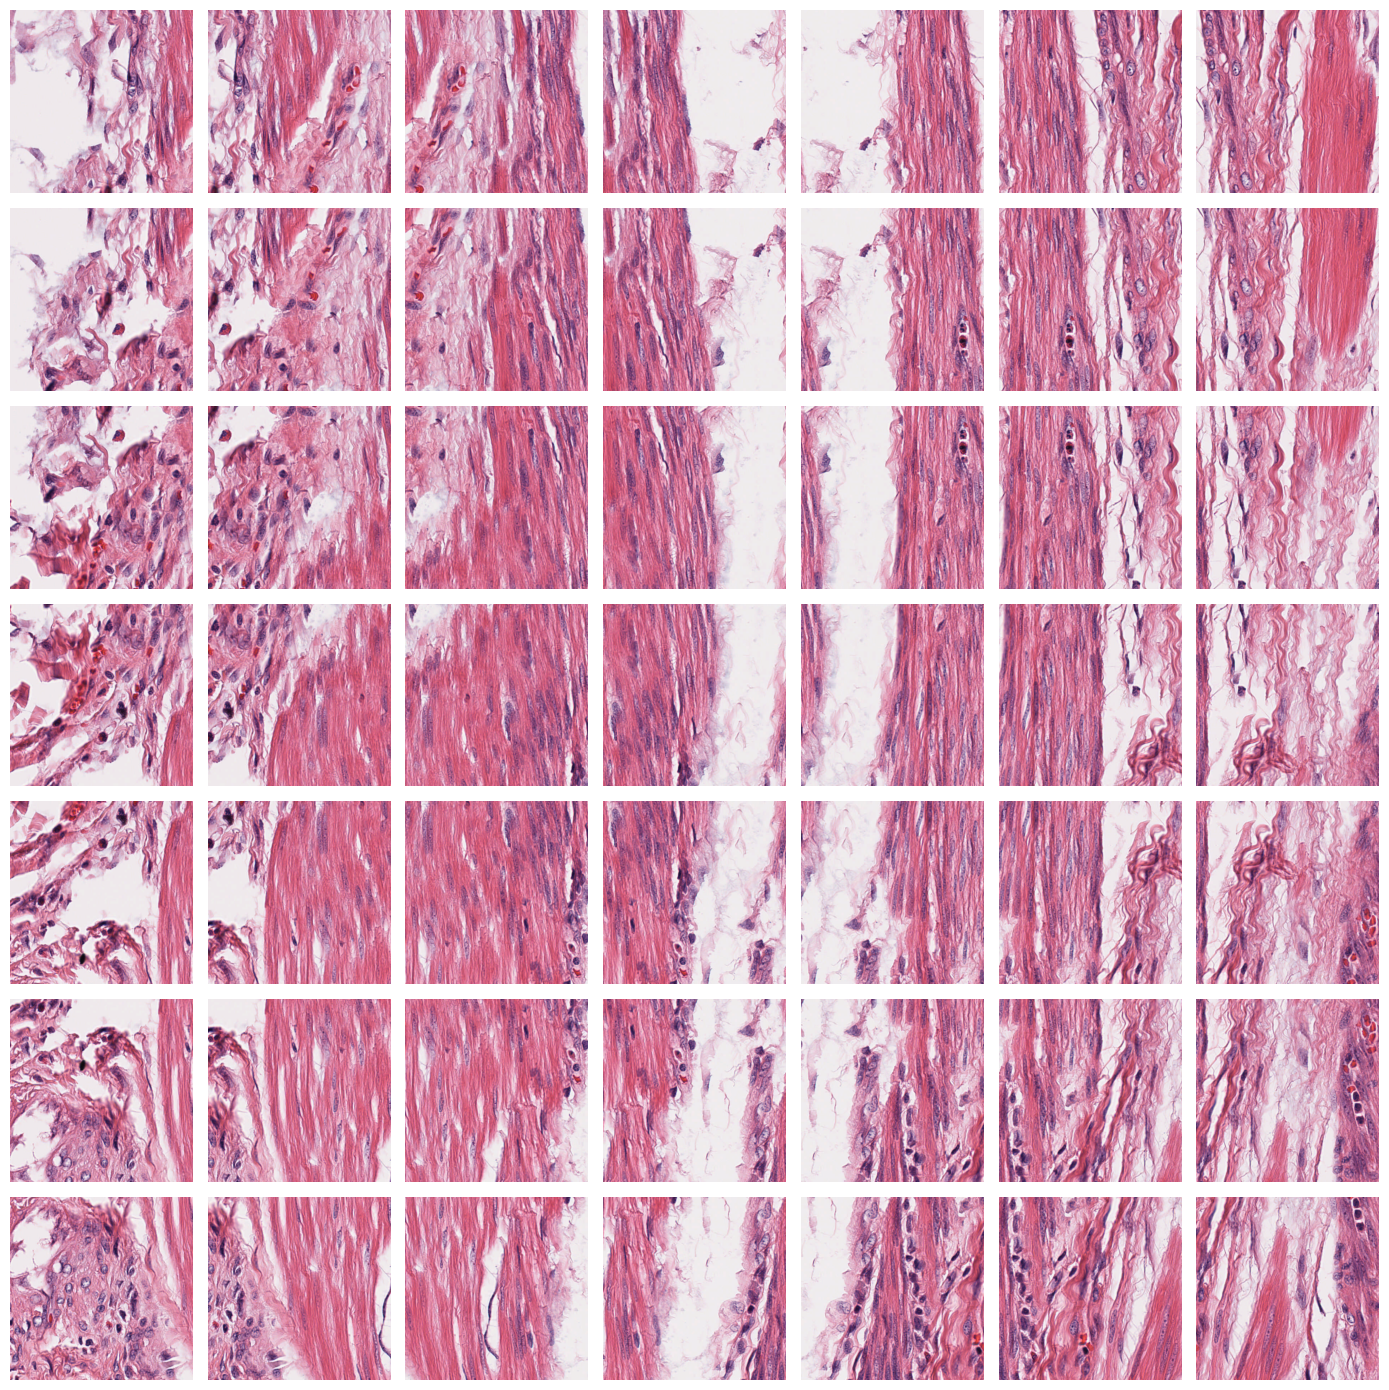

In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置完整 base name
full_base = "TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672"

# 提取信息
parts = full_base.split("_")
base_name = "_".join(parts[:-2])
base_row = int(parts[-2])
base_col = int(parts[-1])

# 参数
stride = 256
rows, cols = 7, 7
patch_size = 512
image_dir = "/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512"

img_list = []
# 创建子图
fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for r in range(rows):
    for c in range(cols):
        r_offset = r * stride
        c_offset = c * stride
        fname = f"{base_name}_{base_row}_{base_col}_r{r_offset}_c{c_offset}.png"
        path = os.path.join(image_dir, fname)
        img_list.append(path)

        if not os.path.exists(path):
            img = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)
            print(f"Missing: {path}")
        else:
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axs[r, c].imshow(img)
        # axs[r, c].set_title(f"r{r_offset}_c{c_offset}", fontsize=8)
        axs[r, c].axis("off")

plt.tight_layout()
# plt.suptitle(full_base, fontsize=12)
plt.show()


In [25]:
img_list

['/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c0.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c256.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c512.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c768.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c1024.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c1280.png',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl

In [7]:
import glob,os
prompts = glob.glob('/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/*')
print(len(prompts))

978628


In [8]:
prompts[0]

'/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-K4-A5RJ-01Z-00-DX1.DFDDA8B5-E80F-4BF9-87E3-EA75E294ABF5_42496_51168_r0_c0.txt'

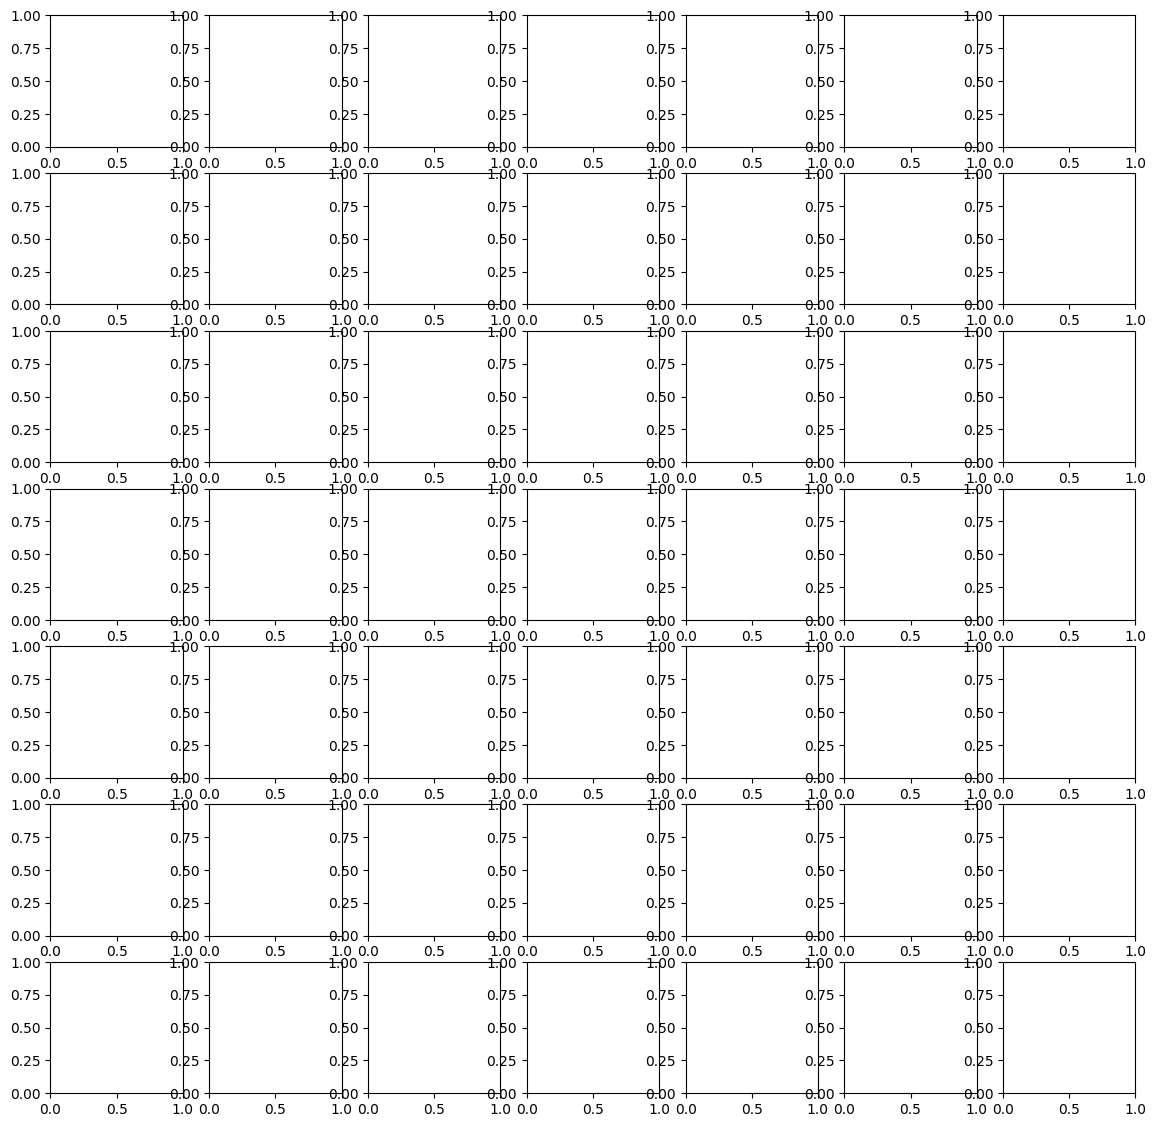

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置完整 base name
full_base = "TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672"

# 提取信息
parts = full_base.split("_")
base_name = "_".join(parts[:-2])
base_row = int(parts[-2])
base_col = int(parts[-1])

# 参数
stride = 256
rows, cols = 7, 7
patch_size = 512
image_dir = "/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts"

prompt_list = []
# 创建子图
fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for r in range(rows):
    for c in range(cols):
        r_offset = r * stride
        c_offset = c * stride
        fname = f"{base_name}_{base_row}_{base_col}_r{r_offset}_c{c_offset}.txt"
        path = os.path.join(image_dir, fname)
        prompt_list.append(path)



In [10]:
prompt_list

['/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c0.txt',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c256.txt',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c512.txt',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c768.txt',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c1024.txt',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-XF-AAMH-01Z-00-DX1.AB5E1C7D-C3BF-4A69-B614-0ED69F8A3C07_56928_28672_r0_c1280.txt',
 '/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/prompts/TCGA-XF-A

In [11]:
with open(prompt_list[0], "r", encoding="utf-8") as f:
    text = f.read()

In [12]:
text

'The tissue image displays disorganized, spindle-shaped smooth muscle cells with elongated nuclei and eosinophilic cytoplasm. Variations in staining indicate interspersed connective tissue. The irregular architecture suggests a possible pathological alteration. Definitive diagnosis requires further clinical and histological context, including specific staining methods.'

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:12<00:00,  1.58it/s]


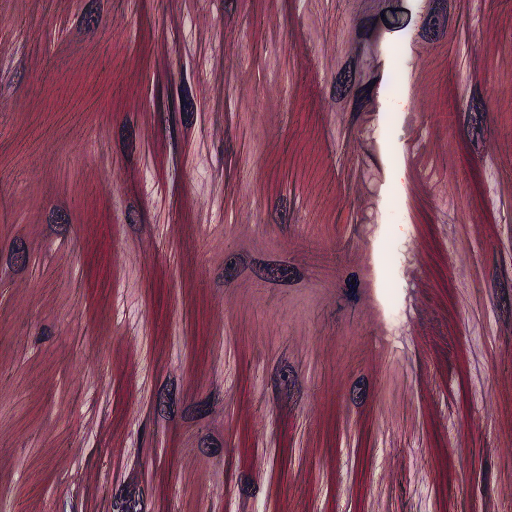

In [22]:
i = 8
samples = ctrlora.sample(
    cond_image_paths=path_list[i],
    prompt=text,
    n_prompt='worst quality',
    num_samples=1,
)
samples[0]

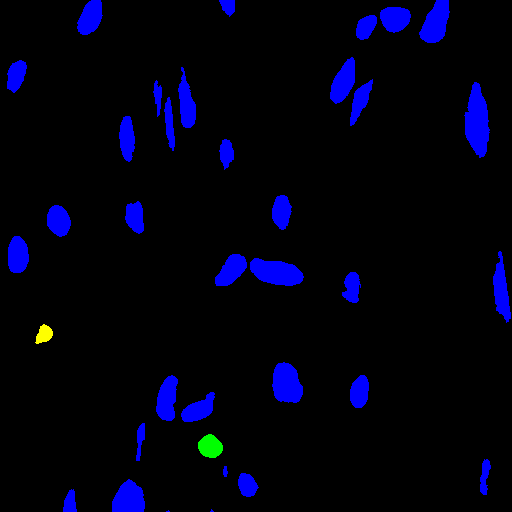

In [23]:
Image.open(path_list[i])

In [15]:
samples

[<PIL.Image.Image image mode=RGB size=512x512>]